In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/adult.csv') #reading and loading dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# dropping any null values
df = df.copy().dropna()
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [5]:
#df
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns
#
## Replace missing values of numerical columns with mean
df_numerical_imputed = df.copy()
df_numerical_imputed[numerical_columns] = df_numerical_imputed[numerical_columns].replace('?', df_numerical_imputed[numerical_columns].astype(float).mean())
#
# Replace missing values of categorical columns with mode
df_categorical_imputed = df.copy()
df_categorical_imputed[categorical_columns] = df_categorical_imputed[categorical_columns].replace('?', df_categorical_imputed[categorical_columns].mode().iloc[0])
#
#
df_mean_imputed = pd.concat([df_numerical_imputed[numerical_columns], df_categorical_imputed[categorical_columns]], axis=1)
#
print(df_mean_imputed.isnull().sum())



age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
workclass          0
education          0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
native-country     0
income             0
dtype: int64


In [6]:
df=df_mean_imputed
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,226802,7,0,0,40,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,89814,9,0,0,50,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,336951,12,0,0,40,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,160323,10,7688,0,40,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,18,103497,10,0,0,30,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,40,154374,9,0,0,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,58,151910,9,0,0,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,22,201490,9,0,0,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


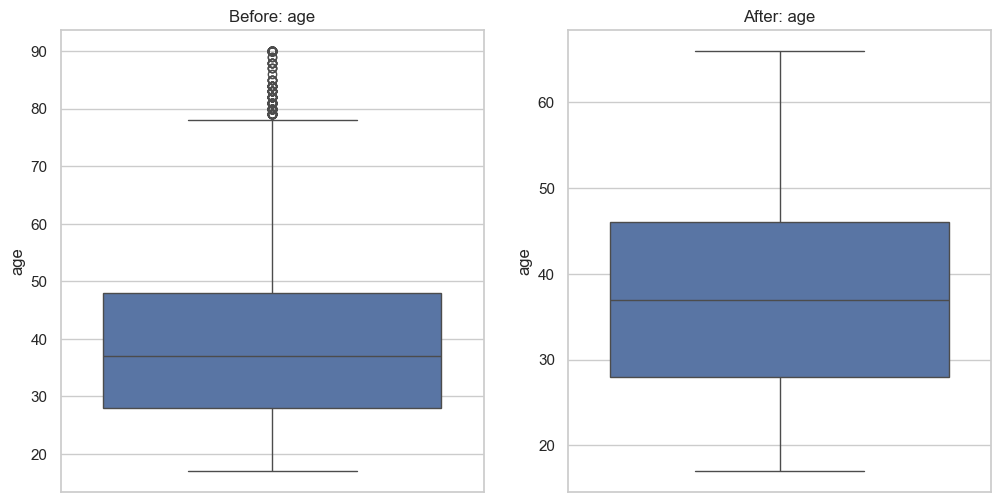

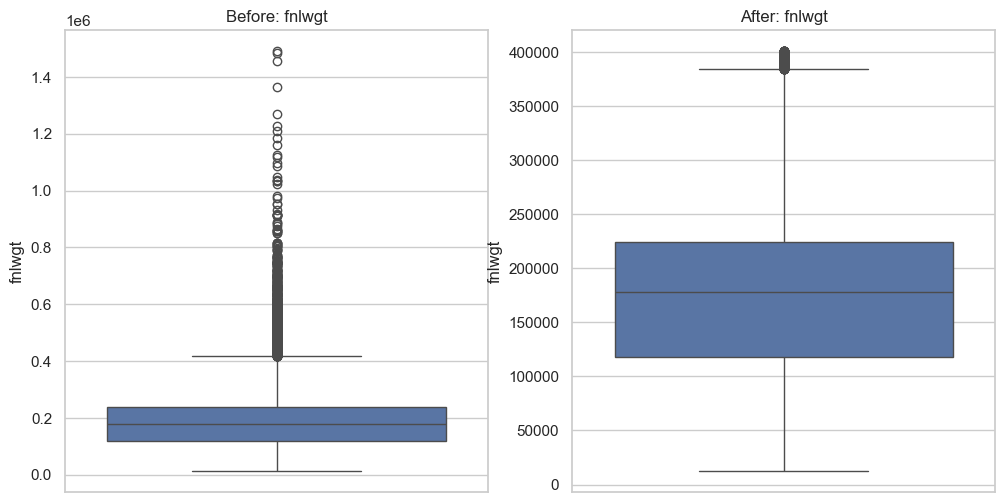

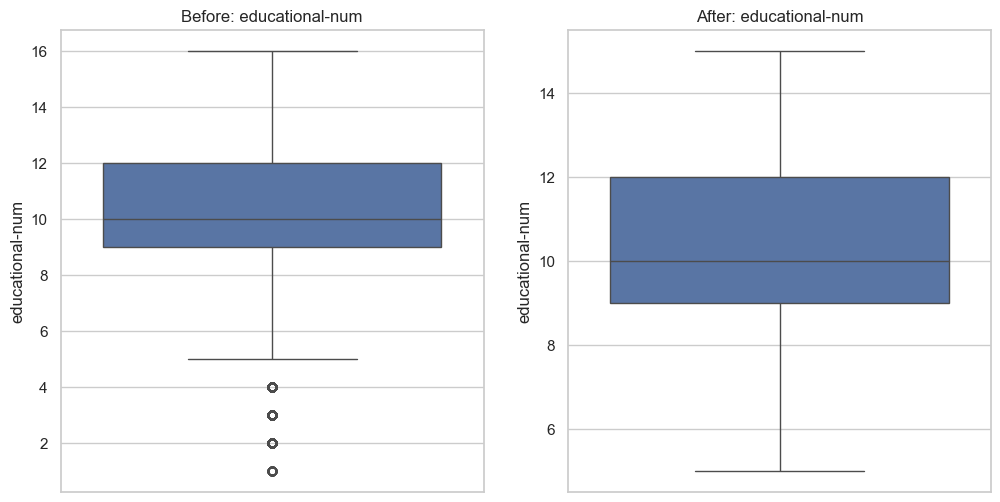

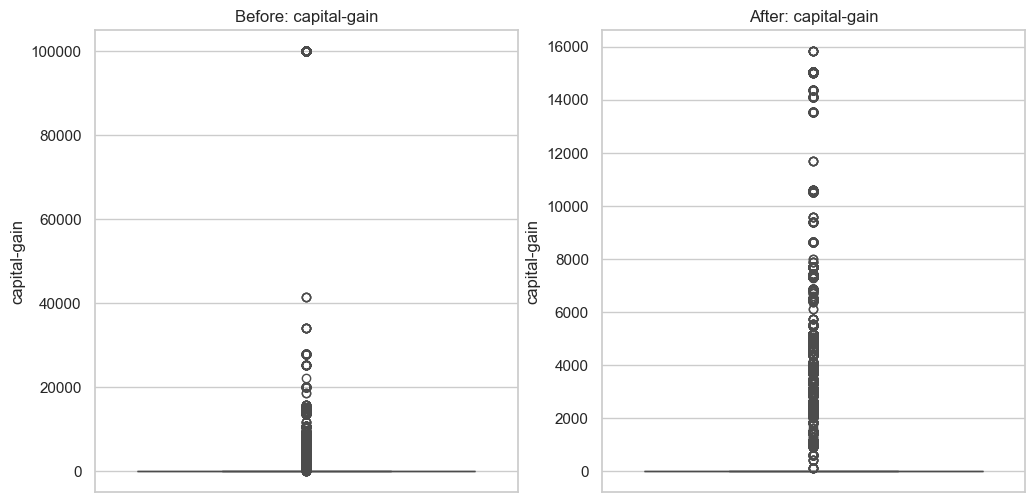

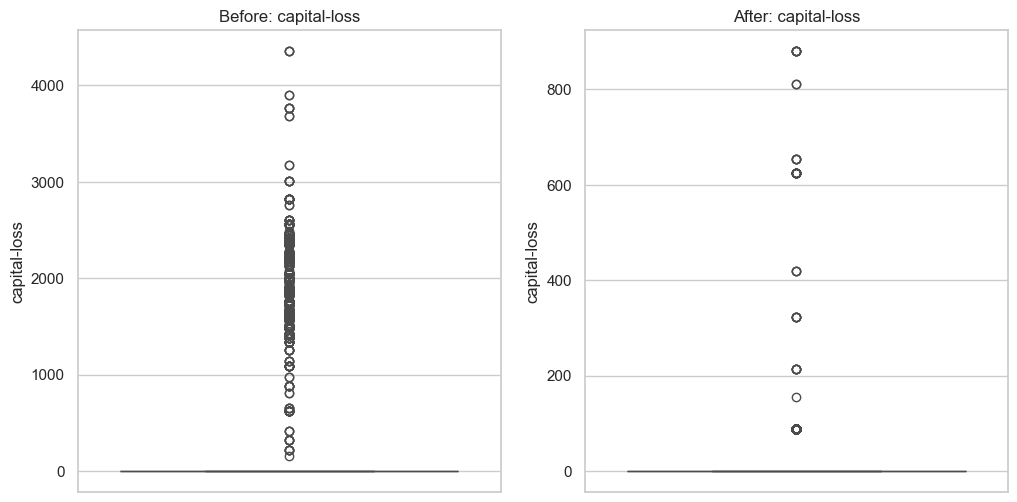

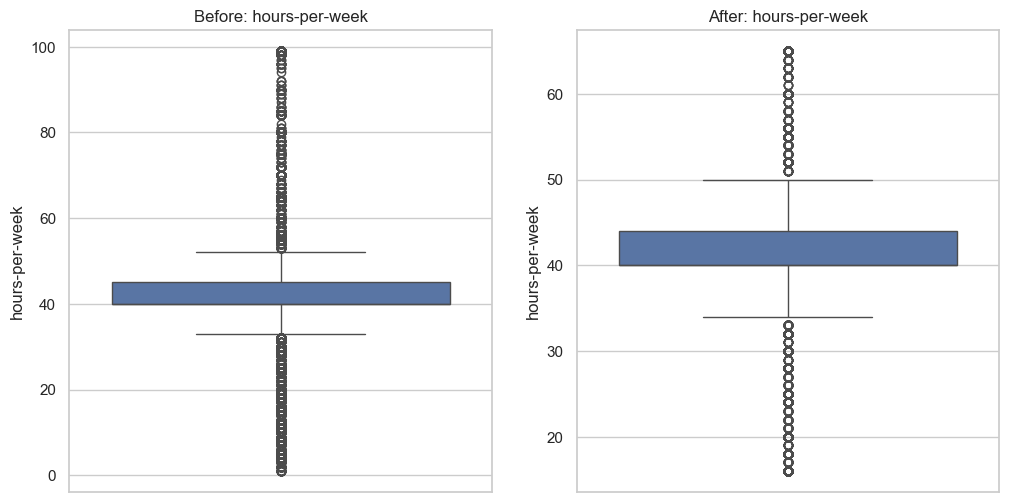

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style='whitegrid')

# Iterate over each numerical column in the DataFrame
for column in numerical_columns:
    # Calculate the mean and standard deviation of the column
    mean = df[column].mean()
    std = df[column].std()

    # Identify outliers
    outliers = (df[column] < (mean - 2 * std)) | (df[column] > (mean + 2 * std))

    # Create a copy of the DataFrame for before and after comparison
    df_before = df.copy()

    # Plot before handling outliers
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.boxplot(y=df_before[column])
    plt.title(f'Before: {column}')

    # Replace outliers in the original DataFrame for 'after' visualization
    if df[column].dtype.kind in 'iu':
        df.loc[outliers, column] = int(mean)
    else:
        df.loc[outliers, column] = mean

    # Plot after handling outliers
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(y=df[column])
    plt.title(f'After: {column}')

    plt.show()


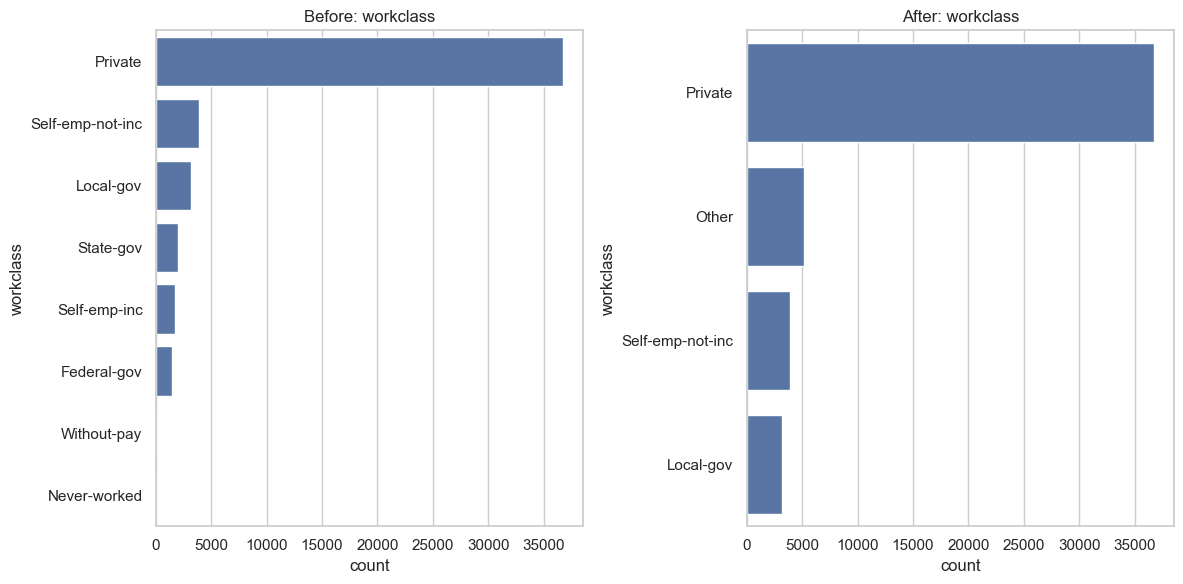

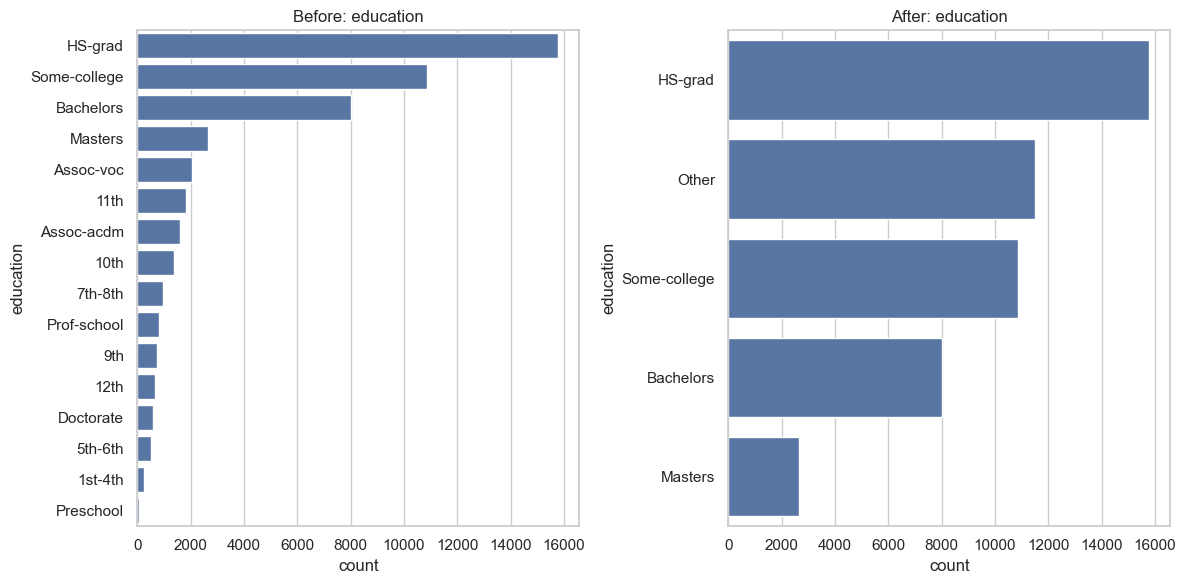

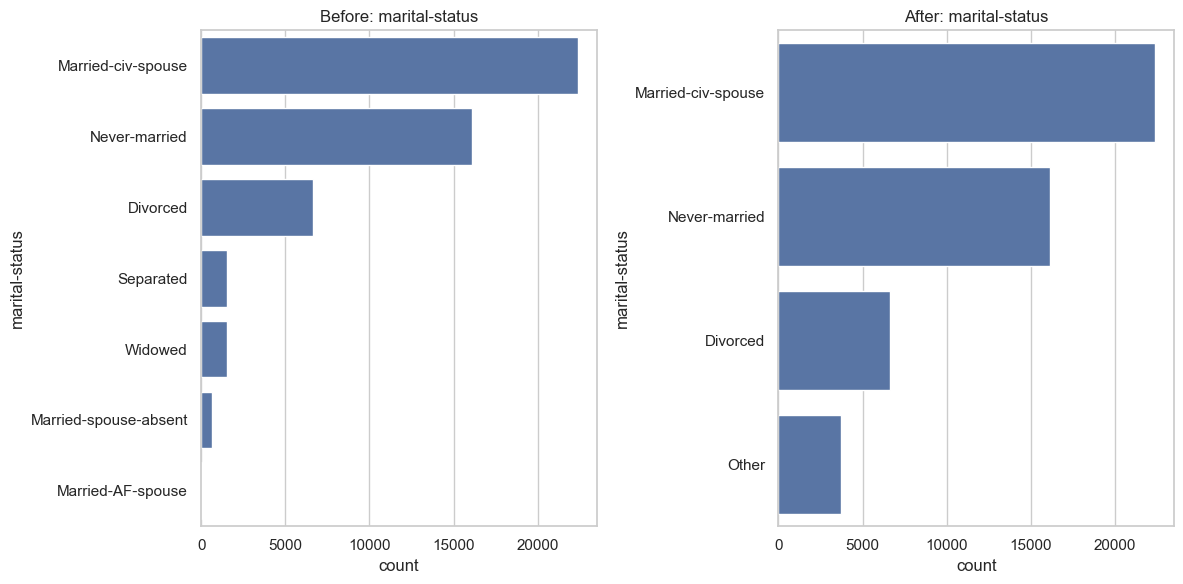

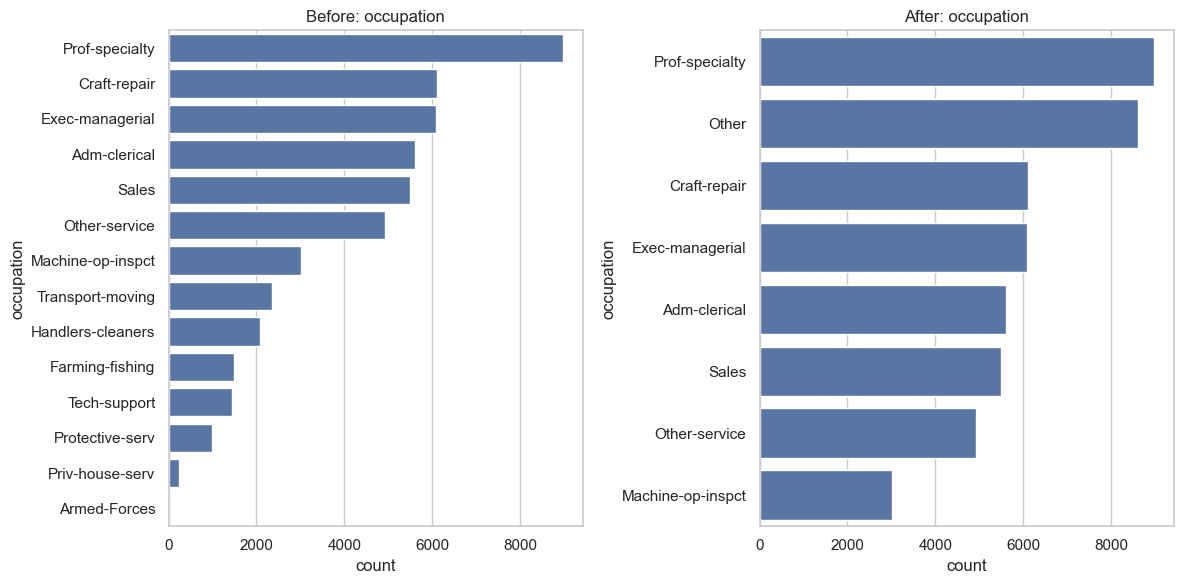

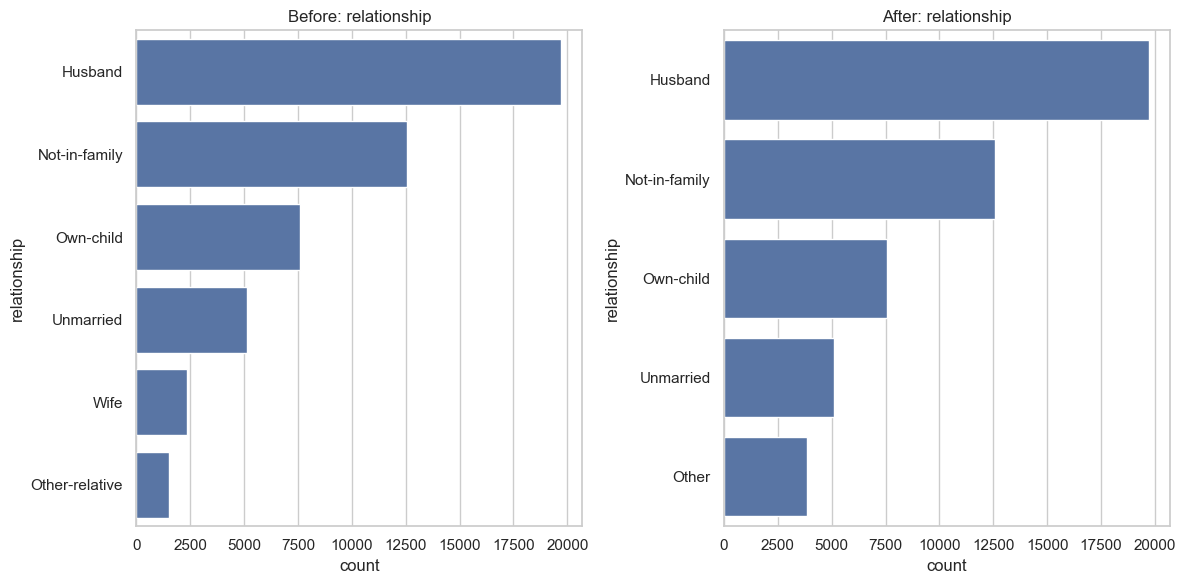

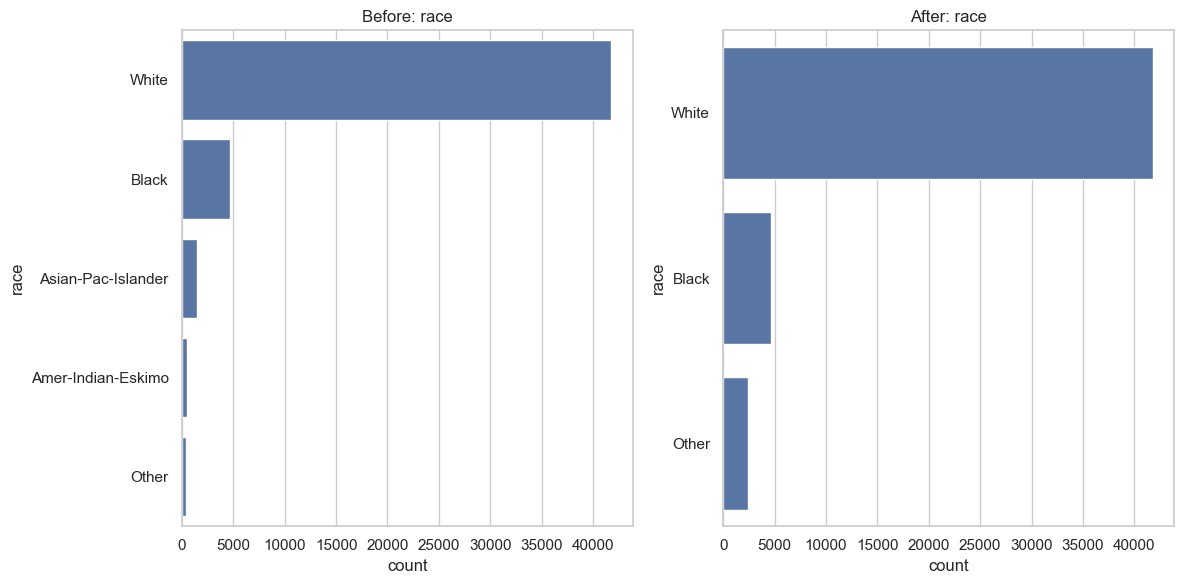

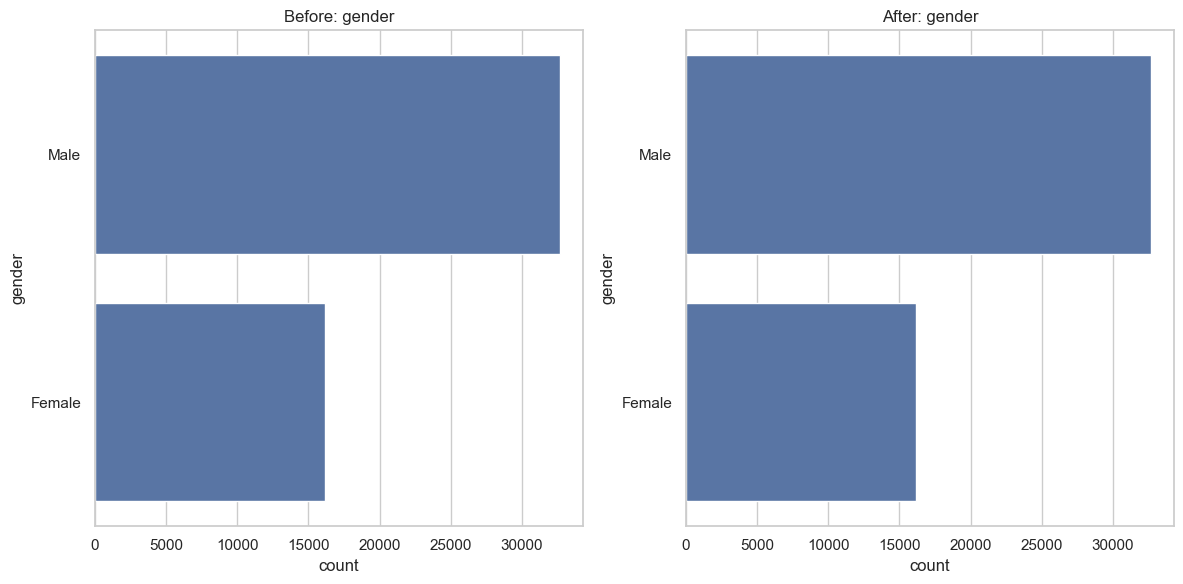

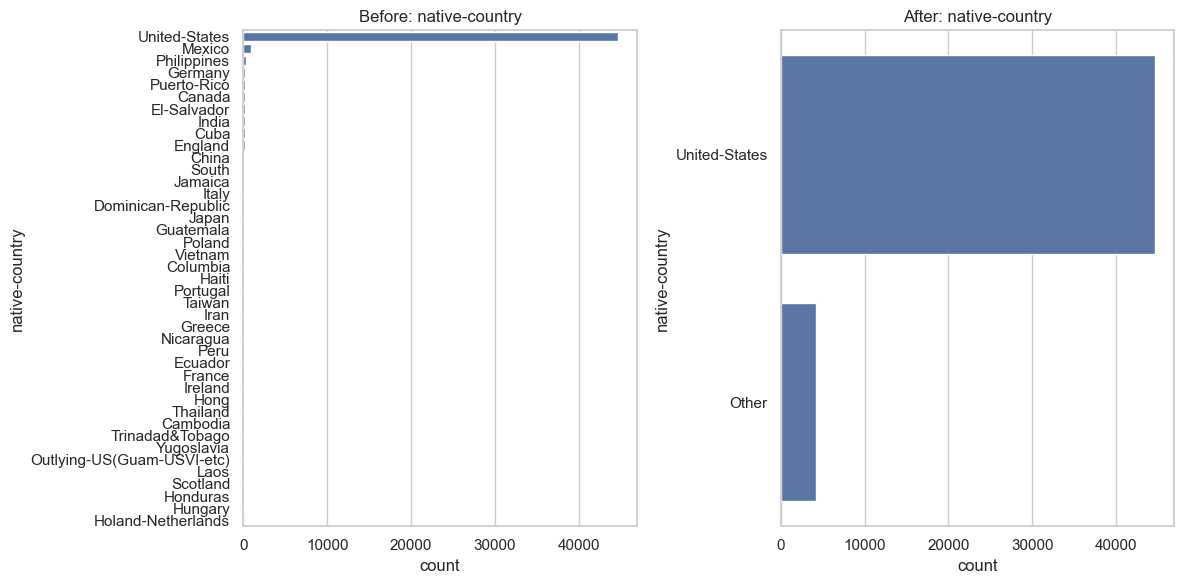

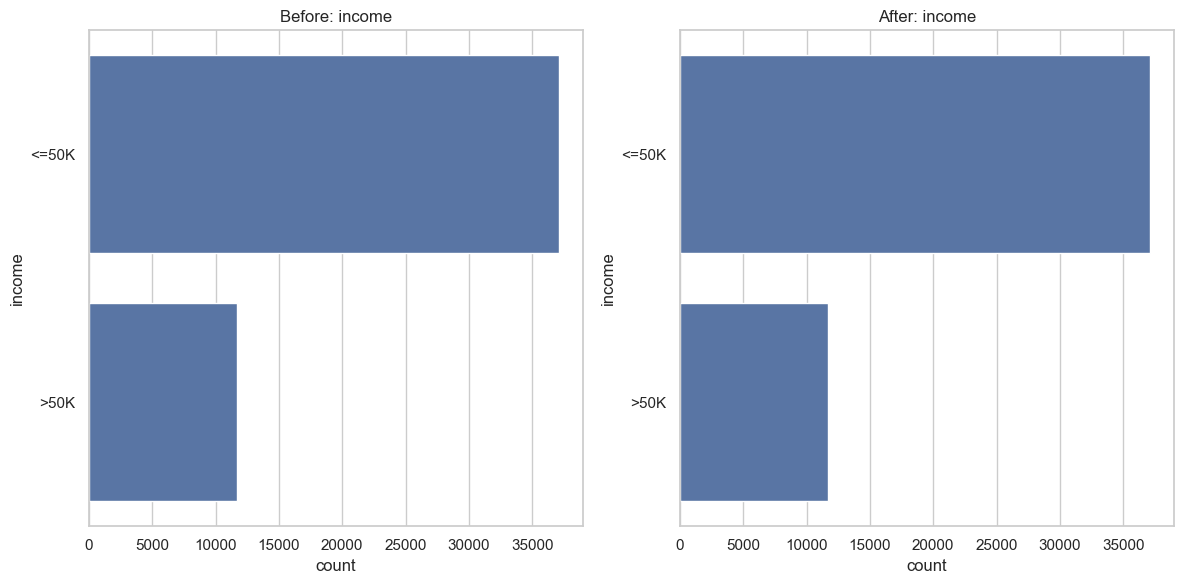

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style='whitegrid')

# Define a threshold for rare categories, for example, categories that constitute less than 5% of the data
threshold_percentage = 5

# Iterate over each categorical column in the DataFrame
for column in categorical_columns:
    # Calculate the frequency of each category
    frequency = df[column].value_counts(normalize=True) * 100  # percentages

    # Identify rare categories
    rare_categories = frequency[frequency < threshold_percentage].index

    # Create a copy of the DataFrame for before and after comparison
    df_before = df.copy()

    # Plot before handling rare categories
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.countplot(y=df_before[column], order=df_before[column].value_counts().index)
    plt.title(f'Before: {column}')
    plt.tight_layout()

    # Replace rare categories in the original DataFrame for 'after' visualization
    df[column] = df[column].replace(rare_categories, 'Other')

    # Plot after handling rare categories
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'After: {column}')
    plt.tight_layout()

    plt.show()


In [9]:
#categorical_columns = df.select_dtypes(include=['int64']).columns
#print(categorical_columns)
#for x in categorical_columns:
#    print(df[x].mean())
#
#
## For categorical columns, find the most repeated value
#categorical_columns = df.select_dtypes(include=['object']).columns
#most_repeated_values = {}
#for col in categorical_columns:
#    most_repeated_value = df[col].mode()[0]
#    most_repeated_values[col] = most_repeated_value
#
#print("Most repeated value for each categorical column:")
#for col, value in most_repeated_values.items():
#    print(f"{col}: {value}")
#This code will print the mean value for each numeri

***ENCODING***


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column data type is object (categorical)
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = label_encoder.fit_transform(df[column])

# Display the modified DataFrame
print(df)


       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  workclass  education  marital-status  occupation  \
0                  40          2          3               2           3   
1                  50          2          1  

In [11]:
#lets find out the unique categories in the column maritial0status
#Ordinal Encoding 
#unique_categories = df['marital-status'].unique()
#print("Unique categories:", unique_categories)
#

In [12]:
#mapping these categories into integers


In [13]:
#mapping = {
#    'Never-married': 1,
#    'Married-civ-spouse': 2,
#    'Divorced': 3,
#    'Married-spouse-absent': 4,
#    'Separated': 5,
#    'Married-AF-spouse': 6,
#    'Widowed': 7
#}

In [14]:
#apply mapping to dataframe

In [15]:
#df['marital-status-encoded'] = df['marital-status'].map(mapping)

In [16]:
#df['marital-status-encoded']

In [17]:
#dropping the original 'marital-status' column as we no longer need it
#df.drop(columns=['marital-status'], inplace=True)

In [18]:
#df

In [19]:
# let's now focus on the work-class

In [20]:
#unique_categories_workclass = df['workclass'].unique()
#print("Unique categories in workclass:", unique_categories_workclass)

In [21]:
# Step 2: Create Dummy Variables
# Use pandas.get_dummies() function to create dummy variables
#dummy_variables_workclass = pd.get_dummies(df['workclass'], prefix='workclass')

In [22]:
#print(dummy_variables_workclass)

In [23]:
# Step 3: Merge Dummy Variables with the Original DataFrame
# Concatenate the original DataFrame with the dummy variables DataFrame
#df = pd.concat([df, dummy_variables_workclass], axis=1)



In [24]:
## Optionally, you can drop the original 'workclass' column if you no longer need it
#df.drop(columns=['workclass'], inplace=True)
#
## Display the DataFrame to verify the changes
#print(df.head())

In [25]:
# let's now focus on the occupation

In [26]:
#unique_categories_occupation = df['occupation'].unique()

In [27]:
#print(unique_categories_occupation)

In [28]:
#dummy_variables_occupation = pd.get_dummies(df['occupation'], prefix='occupation')
#dummy_variables_occupation

In [29]:
#adding the dummy variables columns of occupation with our orignial df 
#df = pd.concat([df, dummy_variables_occupation], axis=1)

In [30]:
#df.drop(columns=['occupation'], inplace=True)

In [31]:
#df

In [32]:
#df.info()

In [33]:
#unique_categories_relationship = df['relationship'].unique()
#print("Unique categories in relationship:", unique_categories_relationship)
#
#unique_categories_race = df['race'].unique()
#print("Unique categories in race:", unique_categories_race)
#
#unique_categories_sex = df['gender'].unique()
#print("Unique categories in sex:", unique_categories_sex)
#
#unique_categories_native_country = df['native-country'].unique()
#print("Unique categories in native-country:", unique_categories_native_country)
## For 'relationship'
#dummy_variables_relationship = pd.get_dummies(df['relationship'], prefix='relationship')
#df = pd.concat([df, dummy_variables_relationship], axis=1)
#df.drop(columns=['relationship'], inplace=True)
#
## For 'race'
#dummy_variables_race = pd.get_dummies(df['race'], prefix='race')
#df = pd.concat([df, dummy_variables_race], axis=1)
#df.drop(columns=['race'], inplace=True)
#
## For 'sex'
#dummy_variables_sex = pd.get_dummies(df['gender'], prefix='gender')
#df = pd.concat([df, dummy_variables_sex], axis=1)
#df.drop(columns=['gender'], inplace=True)
#
## For 'native-country'
#dummy_variables_native_country = pd.get_dummies(df['native-country'], prefix='native-country')
#df = pd.concat([df, dummy_variables_native_country], axis=1)
#df.drop(columns=['native-country'], inplace=True)
#
## Display the DataFrame to verify the changes
#print(df.head())

In [34]:
#df.info()

In [35]:
#for income column
#unique_category_income = df['income'].unique()
#unique_category_income

In [36]:
#dummy_variable_income = pd.get_dummies(df['income'], prefix='income')
#print(dummy_variable_income)

In [37]:
#df = pd.concat([df, dummy_variable_income],axis =1)
#df.drop(columns=['income'], inplace=True)

In [38]:
#df

In [39]:
##df.info()

feature removing


In [40]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor
import numpy as np

# Assuming df is your data frame after preprocessing

# 1. Remove columns with more than 70% null values
#threshold_null = 0.7 * len(df)
#df = df.dropna(thresh=threshold_null, axis=1)
#
## 2. Remove highly correlated features
## Calculate the correlation matrix
#corr_matrix = df.corr().abs()
## Select upper triangle of correlation matrix
##upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#
## Find features with correlation greater than 0.80
#to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
## Drop the highly correlated features
#df = df.drop(to_drop, axis=1)
#
## 3. Apply RFECV
## Initialize a classifier or regressor based on your target variable nature
#estimator = RandomForestClassifier(random_state=42)  # or RandomForestRegressor for regression problems
## Initialize RFECV
#selector = RFECV(estimator, step=1, cv=5)
## Fit RFECV
#X = df.drop(columns=['income'])  # Assuming 'income' is your target variable
#y = df['income']
#selector = selector.fit(X, y)
#
## Transform the dataset
#X_transformed = selector.transform(X)
#
## Get the support and ranking of the features
#print("Features ranking: ", selector.ranking_)
#print("Selected features after RFECV: ", X.columns[selector.support_])
#
## Update your dataset to only include the selected features
#df_selected_features = df[X.columns[selector.support_].tolist() + ['income']]
#
## Now df_selected_features contains only the features selected through all your criteria
#print(df_selected_features)

splitting the data 70:30


In [41]:
from sklearn.model_selection import train_test_split
# Assuming df is your DataFrame
column_list = df.columns.tolist()

# Display the list of column names
#print(column_list)

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X):", X_train.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Testing set shape (y):", y_test.shape)
X_train_balanced=X_train
y_train_balanced=y_train

Training set shape (X): (34189, 14)
Training set shape (y): (34189,)
Testing set shape (X): (14653, 14)
Testing set shape (y): (14653,)


In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks



In [43]:
# Initialize SMOTE and TOMTEK
smote = SMOTE()
tomtek = TomekLinks()

# Apply SMOTE to upsample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply TOMTEK to downsample the majority class
X_train_balanced, y_train_balanced = tomtek.fit_resample(X_train_smote, y_train_smote)


In [44]:
## Count the occurrences of each class in the balanced dataset
print("Class distribution after balancing:")
print(y_train_balanced.value_counts())


Class distribution after balancing:
income
0    25922
1    23607
Name: count, dtype: int64


In [45]:
from imblearn.over_sampling import RandomOverSampler

# Define the oversampling strategy
oversampler = RandomOverSampler(sampling_strategy='minority')

# Oversample the minority class
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_smote, y_train_smote)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(y_train_balanced.value_counts())


Class distribution after oversampling:
income
0    25922
1    25922
Name: count, dtype: int64


Logistic regression


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score



In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

# Define the stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Perform the K-Fold cross-validation
for train_index, test_index in kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the fold's training data
    logistic_regression_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the fold's testing data
    y_pred_fold = logistic_regression_model.predict(X_test_fold)

    # Calculate and store the metrics for this fold
    accuracies.append(accuracy_score(y_test_fold, y_pred_fold))
    precisions.append(precision_score(y_test_fold, y_pred_fold))
    recalls.append(recall_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold))
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))

# Calculate the average of each metric
accuracy_logistic = np.mean(accuracies)
precision_logistic = np.mean(precisions)
recall_logistic = np.mean(recalls)
f1_logistic = np.mean(f1_scores)
conf_matrix = np.sum(conf_matrices, axis=0)

# Print the results
print("Logistic Regression - Cross-Validation Metrics:")
print(f"Mean Accuracy: {accuracy_logistic}")
print(f"Mean Precision: {precision_logistic}")
print(f"Mean Recall: {recall_logistic}")
print(f"Mean F1-score: {f1_logistic}")



C:\Users\dellG15\Documents\PredictingIncomeClass\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dellG15\Documents\PredictingIncomeClass\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression - Cross-Validation Metrics:
Mean Accuracy: 0.8106342520057975
Mean Precision: 0.683316238059584
Mean Recall: 0.39068919401900704
Mean F1-score: 0.49652966752592825


NameError: name 'class_labels' is not defined

<Figure size 800x600 with 0 Axes>

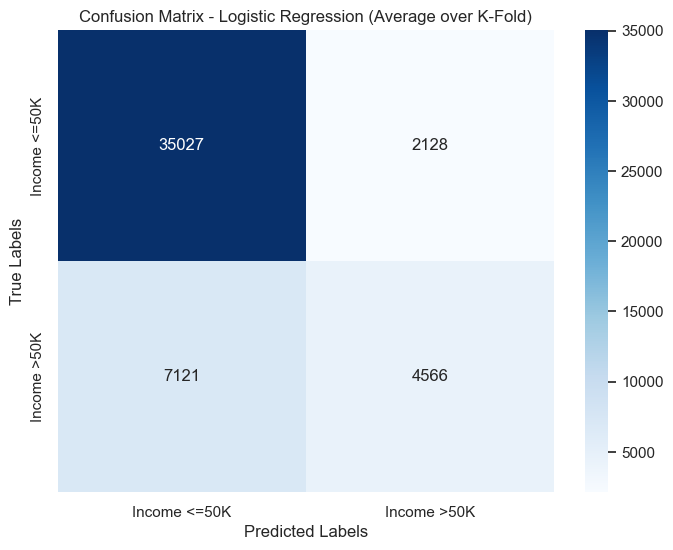

In [48]:
# Plot the confusion matrix
class_labels = ['Income <=50K', 'Income >50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression (Average over K-Fold)')
plt.show()


In [50]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

    Random Forest
    

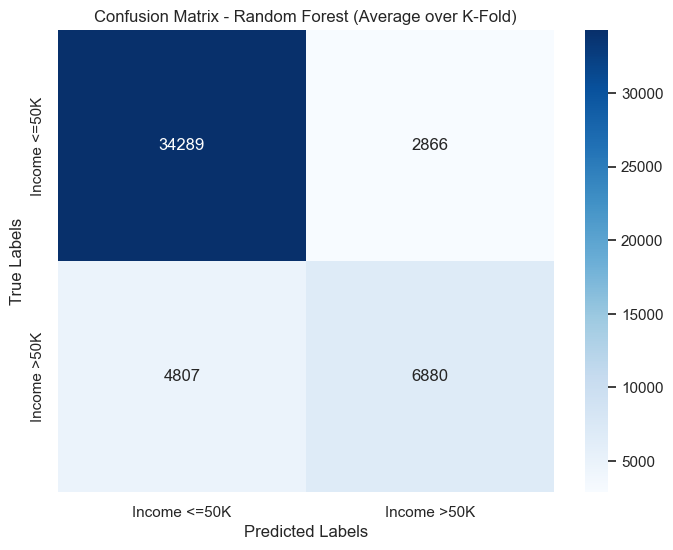

In [53]:
# Initialize metrics aggregation
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)


accuracy_rf = []
precision_rf = []
recall_rf = []
f1_rf = []
conf_matrix_list_rf = []

# Perform K-Fold cross-validation
for train_index, test_index in kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    rf_classifier.fit(X_train_fold, y_train_fold)
    y_pred_fold_rf = rf_classifier.predict(X_test_fold)

    # Calculate and store the metrics for this fold
    accuracy_rf.append(accuracy_score(y_test_fold, y_pred_fold_rf))
    precision_rf.append(precision_score(y_test_fold, y_pred_fold_rf))
    recall_rf.append(recall_score(y_test_fold, y_pred_fold_rf))
    f1_rf.append(f1_score(y_test_fold, y_pred_fold_rf))
    conf_matrix_list_rf.append(confusion_matrix(y_test_fold, y_pred_fold_rf))

# Compute the mean of the metrics
accuracy_rf = np.mean(accuracy_rf)
precision_rf = np.mean(precision_rf)
recall_rf = np.mean(recall_rf)
f1_rf = np.mean(f1_rf)
conf_matrix_rf = sum(conf_matrix_list_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest (Average over K-Fold)')
plt.show()


In [ ]:
# Print the results
print("Precision - Random Forest Classifier:", precision_rf)
print("Recall - Random Forest Classifier:", recall_rf)
print("F1-score - Random Forest Classifier:", f1_rf)

support vector machine

In [ ]:
# Initialize metrics aggregation for SVM
accuracy_svm = []
precision_svm = []
recall_svm = []
f1_svm = []
conf_matrix_list_svm = []

# Perform K-Fold cross-validation
for train_index, test_index in kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    svm_classifier.fit(X_train_fold, y_train_fold)
    y_pred_fold = svm_classifier.predict(X_test_fold)

    # Calculate and store the metrics for this fold
    accuracy_svm.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_svm.append(precision_score(y_test_fold, y_pred_fold))
    recall_svm.append(recall_score(y_test_fold, y_pred_fold))
    f1_svm.append(f1_score(y_test_fold, y_pred_fold))
    conf_matrix_list_svm.append(confusion_matrix(y_test_fold, y_pred_fold))

# Compute the mean of the metrics
accuracy_svm = np.mean(accuracy_svm)
precision_svm = np.mean(precision_svm)
recall_svm = np.mean(recall_svm)
f1_svm = np.mean(f1_svm)
conf_matrix_svm = sum(conf_matrix_list_svm)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM (Average over K-Fold)')
plt.show()


decision Tree classifier


In [ ]:
# Initialize metrics aggregation for Decision Tree
accuracy_dt = []
precision_dt = []
recall_dt = []
f1_dt = []
conf_matrix_list_dt = []

# Perform K-Fold cross-validation
for train_index, test_index in kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    dt_classifier.fit(X_train_fold, y_train_fold)
    y_pred_fold = dt_classifier.predict(X_test_fold)

    # Calculate and store the metrics for this fold
    accuracy_dt.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_dt.append(precision_score(y_test_fold, y_pred_fold))
    recall_dt.append(recall_score(y_test_fold, y_pred_fold))
    f1_dt.append(f1_score(y_test_fold, y_pred_fold))
    conf_matrix_list_dt.append(confusion_matrix(y_test_fold, y_pred_fold))

# Compute the mean of the metrics
accuracy_dt = np.mean(accuracy_dt)
precision_dt = np.mean(precision_dt)
recall_dt = np.mean(recall_dt)
f1_dt = np.mean(f1_dt)
conf_matrix_dt = sum(conf_matrix_list_dt)

# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree (Average over K-Fold)')
plt.show()


lightgbm

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
import numpy as np

# Initialize K-Fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize metrics lists
accuracy_lgb, precision_lgb, recall_lgb, f1_lgb = [], [], [], []
conf_matrix_list_lgb = []

# Loop through each fold
for train_index, test_index in kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model
    lgb_classifier = lgb.LGBMClassifier(random_state=42)
    lgb_classifier.fit(X_train_fold, y_train_fold)
    y_pred_lgb = lgb_classifier.predict(X_test_fold)

    # Calculate metrics
    accuracy_lgb.append(accuracy_score(y_test_fold, y_pred_lgb))
    precision_lgb.append(precision_score(y_test_fold, y_pred_lgb, average='binary'))
    recall_lgb.append(recall_score(y_test_fold, y_pred_lgb, average='binary'))
    f1_lgb.append(f1_score(y_test_fold, y_pred_lgb, average='binary'))
    conf_matrix_list_lgb.append(confusion_matrix(y_test_fold, y_pred_lgb))

# Calculate the mean of each metric
accuracy_lgb = np.mean(accuracy_lgb)
precision_lgb = np.mean(precision_lgb)
recall_lgb = np.mean(recall_lgb)
f1_lgb = np.mean(f1_lgb)
conf_matrix_lgb = np.sum(conf_matrix_list_lgb, axis=0)

# Print the results
print("LightGBM Classifier - K-Fold Cross-Validation Metrics:")
print(f"Mean Accuracy: {accuracy_lgb}")
print(f"Mean Precision: {precision_lgb}")
print(f"Mean Recall: {recall_lgb}")
print(f"Mean F1-score: {f1_lgb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LightGBM (Average over K-Fold)')
plt.show()


naive bayes

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Initialize K-Fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize metrics lists
accuracy_nb, precision_nb, recall_nb, f1_nb = [], [], [], []
conf_matrix_list_nb = []

# Loop through each fold
for train_index, test_index in kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_fold, y_train_fold)
    y_pred_nb = nb_classifier.predict(X_test_fold)

    # Calculate metrics
    accuracy_nb.append(accuracy_score(y_test_fold, y_pred_nb))
    precision_nb.append(precision_score(y_test_fold, y_pred_nb, average='binary'))
    recall_nb.append(recall_score(y_test_fold, y_pred_nb, average='binary'))
    f1_nb.append(f1_score(y_test_fold, y_pred_nb, average='binary'))
    conf_matrix_list_nb.append(confusion_matrix(y_test_fold, y_pred_nb))

# Calculate the mean of each metric
accuracy_nb = np.mean(accuracy_nb)
precision_nb = np.mean(precision_nb)
recall_nb = np.mean(recall_nb)
f1_nb = np.mean(f1_nb)
conf_matrix_nb = np.sum(conf_matrix_list_nb, axis=0)

# Print the results
print("Naive Bayes Classifier - K-Fold Cross-Validation Metrics:")
print(f"Mean Accuracy: {accuracy_nb}")
print(f"Mean Precision: {precision_nb}")
print(f"Mean Recall: {recall_nb}")
print(f"Mean F1-score: {f1_nb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes (Average over K-Fold)')
plt.show()


Gradient Boosting Classifer


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))
gradient_boosting_classification_report =classification_report(y_test, y_pred_gb)
# Calculate accuracy score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy - Gradient Boosting Classifier:", accuracy_gb)

# Print confusion matrix as heatmap
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()


# Calculate precision
precision_gb = precision_score(y_test, y_pred_gb)

# Calculate recall
recall_gb = recall_score(y_test, y_pred_gb)

# Calculate F1-score
f1_gb = f1_score(y_test, y_pred_gb)

# Print the results
print("Precision - Gradient Boosting Classifier:", precision_gb)
print("Recall - Gradient Boosting Classifier:", recall_gb)
print("F1-score - Gradient Boosting Classifier:", f1_gb)


ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluate the model
print("AdaBoost Classifier:")
print(classification_report(y_test, y_pred_adaboost))
adaboost_classification_report =classification_report(y_test, y_pred_adaboost)
# Calculate accuracy score
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy - AdaBoost Classifier:", accuracy_adaboost)

# Print confusion matrix as heatmap
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()


# Calculate precision
precision_adaboost = precision_score(y_test, y_pred_adaboost)

# Calculate recall
recall_adaboost = recall_score(y_test, y_pred_adaboost)

# Calculate F1-score
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# Print the results
print("Precision - AdaBoost Classifier:", precision_adaboost)
print("Recall - AdaBoost Classifier:", recall_adaboost)
print("F1-score - AdaBoost Classifier:", f1_adaboost)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the testing data
y_pred_ab = adaboost_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
f1_ab = f1_score(y_test, y_pred_ab)

# Print the evaluation metrics
print("Accuracy (AdaBoost):", accuracy_ab)
print("Precision (AdaBoost):", precision_ab)
print("Recall (AdaBoost):", recall_ab)
print("F1-Score (AdaBoost):", f1_ab)


xg boost

In [ ]:
import xgboost as xgb

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))
xgboost_classification_report = classification_report(y_test, y_pred_xgb)
# Calculate accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy - XGBoost Classifier:", accuracy_xgb)

# Print confusion matrix as heatmap
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()


# Calculate precision
precision_xgb = precision_score(y_test, y_pred_xgb)

# Calculate recall
recall_xgb = recall_score(y_test, y_pred_xgb)

# Calculate F1-score
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the results
print("Precision - XGBoost Classifier:", precision_xgb)
print("Recall - XGBoost Classifier:", recall_xgb)
print("F1-score - XGBoost Classifier:", f1_xgb)

K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create K Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
print("K Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))
k_nearest_classifier_classification_report = classification_report(y_test, y_pred_knn)
# Calculate accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy - K Nearest Neighbors Classifier:", accuracy_knn)

# Print confusion matrix as heatmap
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - K Nearest Neighbors Classifier")
plt.show()



# Calculate precision
precision_knn = precision_score(y_test, y_pred_knn)

# Calculate recall
recall_knn = recall_score(y_test, y_pred_knn)

# Calculate F1-score
f1_knn = f1_score(y_test, y_pred_knn)

# Print the results
print("Precision - K Nearest Neighbors Classifier:", precision_knn)
print("Recall - K Nearest Neighbors Classifier:", recall_knn)
print("F1-score - K Nearest Neighbors Classifier:", f1_knn)

 Bagging classifier)

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Create Bagging classifier
bagging_classifier = BaggingClassifier(random_state=42)

# Train the model
bagging_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the model
print("Bagging Classifier:")
print(classification_report(y_test, y_pred_bagging))
bagging_classifier_classification_report =classification_report(y_test, y_pred_bagging)
# Calculate accuracy score
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy - Bagging Classifier:", accuracy_bagging)

# Print confusion matrix as heatmap
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()


# Calculate precision
precision_bagging = precision_score(y_test, y_pred_bagging)

# Calculate recall
recall_bagging = recall_score(y_test, y_pred_bagging)

# Calculate F1-score
f1_bagging = f1_score(y_test, y_pred_bagging)

# Print the results
print("Precision - Bagging Classifier:", precision_bagging)
print("Recall - Bagging Classifier:", recall_bagging)
print("F1-score - Bagging Classifier:", f1_bagging)

EVALUATION AND GRAPHS

In [ ]:
import matplotlib.pyplot as plt


# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_ab, accuracy_xgb, accuracy_knn, accuracy_bagging]
#precisions = [precision_logistic, precision_rf, precision_svm, precision_dt, precision_lgb, precision_nb, precision_gb, precision_ab, precision_xgb, precision_knn, precision_bagging]
#recalls = [recall_logistic, recall_rf, recall_svm, recall_dt, recall_lgb, recall_nb, recall_gb, recall_ab, recall_xgb, recall_knn, recall_bagging]
#f1_scores = [f1_logistic, f1_rf, f1_svm, f1_dt, f1_lgb, f1_nb, f1_gb, f1_ab, f1_xgb, f1_knn, f1_bagging]

# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

#Precision
#plt.subplot(2, 2, 2)
#plt.bar(models, precisions, color='lightgreen')
#plt.title('Precision')
#plt.xticks(rotation=45, ha='right')

## Recall
#plt.subplot(2, 2, 3)
#plt.bar(models, recalls, color='salmon')
#plt.title('Recall')
#plt.xticks(rotation=45, ha='right')
#
## F1-score
#plt.subplot(2, 2, 4)
#plt.bar(models, f1_scores, color='gold')
#plt.title('F1-Score')
#plt.xticks(rotation=45, ha='right')
#
#plt.tight_layout()
#plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_ab, accuracy_xgb, accuracy_knn, accuracy_bagging]

# Sort models and accuracies based on accuracies
sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))

# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_accuracies, color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#
## Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest','Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf,accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_adaboost, accuracy_xgb, accuracy_knn, accuracy_bagging]
precisions = [precision_logistic, precision_rf,precision_svm ,precision_dt, precision_lgb, precision_nb, precision_gb, precision_adaboost, precision_xgb, precision_knn, precision_bagging]
recalls = [recall_logistic, recall_rf, recall_dt,recall_svm ,recall_lgb, recall_nb, recall_gb, recall_adaboost, recall_xgb, recall_knn, recall_bagging]
f1_scores = [f1_logistic, f1_rf, f1_dt,f1_svm, f1_lgb, f1_nb, f1_gb, f1_adaboost, f1_xgb, f1_knn, f1_bagging]
#
## Sort models and metrics based on F1-score
sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))
sorted_models, sorted_precisions = zip(*sorted(zip(models, precisions), key=lambda x: x[1], reverse=True))
sorted_models, sorted_recalls = zip(*sorted(zip(models, recalls), key=lambda x: x[1], reverse=True))
sorted_models, sorted_f1_scores = zip(*sorted(zip(models, f1_scores), key=lambda x: x[1], reverse=True))
#
## Plotting the evaluation metrics
#plt.figure(figsize=(15, 12))
#
## Accuracy
#plt.subplot(4, 1, 1)
#plt.bar(sorted_models, sorted_accuracies, color='lightcoral')
#plt.title('Accuracy')
#plt.xticks(rotation=45, ha='right')
#
## Precision
#plt.subplot(4, 1, 2)
#plt.bar(sorted_models, sorted_precisions, color='skyblue')
#plt.title('Precision')
#plt.xticks(rotation=45, ha='right')
#
## Recall
#plt.subplot(4, 1, 3)
#plt.bar(sorted_models, sorted_recalls, color='salmon')
#plt.title('Recall')
#plt.xticks(rotation=45, ha='right')
#
## F1-score
#plt.subplot(4, 1, 4)
#plt.bar(sorted_models, sorted_f1_scores, color='lightgreen')
#plt.title('F1-score')
#plt.xticks(rotation=45, ha='right')
#
#plt.tight_layout()
#plt.show()


In [ ]:
# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_precisions, color='red')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_recalls, color='green')
plt.title('recall')
plt.xticks(rotation=45, ha='right')
plt.ylabel('recall')

plt.tight_layout()
plt.show()

In [ ]:
# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_f1_scores, color='Yellow')
plt.title('f1')
plt.xticks(rotation=45, ha='right')
plt.ylabel('f1')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest','Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf,accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_adaboost, accuracy_xgb, accuracy_knn, accuracy_bagging]
precisions = [precision_logistic, precision_rf,precision_svm, precision_dt, precision_lgb, precision_nb, precision_gb, precision_adaboost, precision_xgb, precision_knn, precision_bagging]
recalls = [recall_logistic, recall_rf, recall_dt,recall_svm, recall_lgb, recall_nb, recall_gb, recall_adaboost, recall_xgb, recall_knn, recall_bagging]
f1_scores = [f1_logistic, f1_rf,f1_svm, f1_dt, f1_lgb, f1_nb, f1_gb, f1_adaboost, f1_xgb, f1_knn, f1_bagging]

# Sort models and metrics based on F1-score
sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))
sorted_models, sorted_precisions = zip(*sorted(zip(models, precisions), key=lambda x: x[1], reverse=True))
sorted_models, sorted_recalls = zip(*sorted(zip(models, recalls), key=lambda x: x[1], reverse=True))
sorted_models, sorted_f1_scores = zip(*sorted(zip(models, f1_scores), key=lambda x: x[1], reverse=True))

# Plotting the evaluation metrics
plt.figure(figsize=(15, 12))

# Accuracy
plt.subplot(4, 1, 1)
bars = plt.bar(sorted_models, sorted_accuracies, color='lightcoral')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

for bar, acc in zip(bars, sorted_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom')

# Precision
plt.subplot(4, 1, 2)
bars = plt.bar(sorted_models, sorted_precisions, color='skyblue')
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

for bar, prec in zip(bars, sorted_precisions):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{prec:.2f}', ha='center', va='bottom')

# Recall
plt.subplot(4, 1, 3)
bars = plt.bar(sorted_models, sorted_recalls, color='salmon')
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

for bar, rec in zip(bars, sorted_recalls):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{rec:.2f}', ha='center', va='bottom')

# F1-score
plt.subplot(4, 1, 4)
bars = plt.bar(sorted_models, sorted_f1_scores, color='lightgreen')
plt.title('F1-score')
plt.xticks(rotation=45, ha='right')

for bar, f1 in zip(bars, sorted_f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{f1:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
all_classification_report=[logistic_regression_classification_report,
random_forest_classification_report ,
decision_tree_classification_report ,
lightgbm_classification_report ,
naive_bayes_classification_report,
gradient_boosting_classification_report, 
adaboost_classification_report ,
xgboost_classification_report ,
k_nearest_classifier_classification_report]



In [ ]:
all_classification_report = {
    'logistic_regression': logistic_regression_classification_report,
    'random_forest': random_forest_classification_report,
    'decision_tree': decision_tree_classification_report,
    'lightgbm': lightgbm_classification_report,
    'naive_bayes': naive_bayes_classification_report,
    'gradient_boosting': gradient_boosting_classification_report,
    'adaboost': adaboost_classification_report,
    'xgboost': xgboost_classification_report,
    'k_nearest_classifier': k_nearest_classifier_classification_report
}

for name, report in all_classification_report.items():
    print(f"Variable name: {name}")
    print(report)


In [ ]:
print(logistic_regression_classification_report)